In [1]:
# Importing pandas and numpy libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

__Data Cleaning and Preprocessing__

The first part of any data science project is preparing your data, which means making sure its in the right place and format for you to conduct your analysis. The first step of any data preparation is importing your raw data and cleaning it.



In [2]:
# Importing the dataset to be analyzed
df = pd.read_csv('employee.csv')

In [3]:
df = pd.read_csv('employee.csv', index_col = 0)
df

,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
UNIQUE_ID,,,,,,,,,
0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
...,...,...,...,...,...,...,...,...,...
1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-06-09,2015-06-09
1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06
1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-10-13,2015-10-13


In [4]:
# Using the info method to see the data types in the dataset and number of missing values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   POSITION_TITLE     2000 non-null   object 
 1   DEPARTMENT         2000 non-null   object 
 2   BASE_SALARY        1886 non-null   float64
 3   RACE               1965 non-null   object 
 4   EMPLOYMENT_TYPE    2000 non-null   object 
 5   GENDER             2000 non-null   object 
 6   EMPLOYMENT_STATUS  2000 non-null   object 
 7   HIRE_DATE          2000 non-null   object 
 8   JOB_DATE           1997 non-null   object 
dtypes: float64(1), object(8)
memory usage: 156.2+ KB


In [5]:
# columns
df.columns

Index(['POSITION_TITLE', 'DEPARTMENT', 'BASE_SALARY', 'RACE',
       'EMPLOYMENT_TYPE', 'GENDER', 'EMPLOYMENT_STATUS', 'HIRE_DATE',
       'JOB_DATE'],
      dtype='object')

In [6]:
# Displaying the first five rows of the dataset
df.head()

,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
UNIQUE_ID,,,,,,,,,
0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


__Clean__

In [7]:
df.isnull().sum()

POSITION_TITLE         0
DEPARTMENT             0
BASE_SALARY          114
RACE                  35
EMPLOYMENT_TYPE        0
GENDER                 0
EMPLOYMENT_STATUS      0
HIRE_DATE              0
JOB_DATE               3
dtype: int64

In [8]:
df.duplicated().sum()

109

In [9]:
# Inspecting the size of df (employee dataset) using the shape attribute
df.shape

(2000, 9)

Some observations made from the cell above are that
1. The columns BASE_SALARY, RACE and JOB_DATE have missing values (non-null representing actual values).
2. There are three datatypes in the dataset; Integer, Object and Float.
3. All the datatypes correspond with the data except those of HIRE_DATE and JOB_DATE. These two columns contain date entries and should have datetime as their datatype.

To solve the issue of null values, there are a number of methods to make up for such values, including dropping the rows containing null values.

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
# Converting HIRE_DATE and JOB_DATE columns to datetime dtype
df['HIRE_DATE'] = pd.to_datetime(df['HIRE_DATE'])
df['JOB_DATE'] = pd.to_datetime(df['JOB_DATE'])

In [12]:
# Using info method again to confirm corrections
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1891 entries, 0 to 1998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   POSITION_TITLE     1891 non-null   object        
 1   DEPARTMENT         1891 non-null   object        
 2   BASE_SALARY        1778 non-null   float64       
 3   RACE               1862 non-null   object        
 4   EMPLOYMENT_TYPE    1891 non-null   object        
 5   GENDER             1891 non-null   object        
 6   EMPLOYMENT_STATUS  1891 non-null   object        
 7   HIRE_DATE          1891 non-null   datetime64[ns]
 8   JOB_DATE           1888 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 147.7+ KB


In [13]:
df

,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
UNIQUE_ID,,,,,,,,,
0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
...,...,...,...,...,...,...,...,...,...
1992,SECURITY OFFICER,Houston Airport System (HAS),29286.0,Hispanic/Latino,Full Time,Male,Active,2011-12-12,2011-12-12
1993,POLICE SERGEANT,Houston Police Department-HPD,81239.0,White,Full Time,Male,Active,1982-05-03,2011-09-03
1994,POLICE CAPTAIN,Houston Police Department-HPD,104455.0,Black or African American,Full Time,Male,Active,1983-02-07,2004-07-08


__EDA__

_make a copy of your dataframe_ 

In [14]:
copy_df = df.copy()

__Distribtion by race/ethnicity__ 

In [15]:
# Get the unique race from the 'RACE' column
df.RACE.value_counts()


RACE
Black or African American            678
White                                622
Hispanic/Latino                      443
Asian/Pacific Islander               106
American Indian or Alaskan Native     11
Others                                 2
Name: count, dtype: int64

In [16]:
# Count the occurrences of each race
racial_composition = df['RACE'].value_counts()

# Calculate the percentage of each race in the dataset
racial_composition_percentage = (racial_composition / len(df)) * 100

# Print the racial/ethnic composition
print("Racial/Ethnic Composition of the Workforce:")
for race, count in racial_composition.items():
    percentage = racial_composition_percentage[race]
    print(f"{race}: {count} ({percentage:.2f}%)")
    

Racial/Ethnic Composition of the Workforce:
Black or African American: 678 (35.85%)
White: 622 (32.89%)
Hispanic/Latino: 443 (23.43%)
Asian/Pacific Islander: 106 (5.61%)
American Indian or Alaskan Native: 11 (0.58%)
Others: 2 (0.11%)


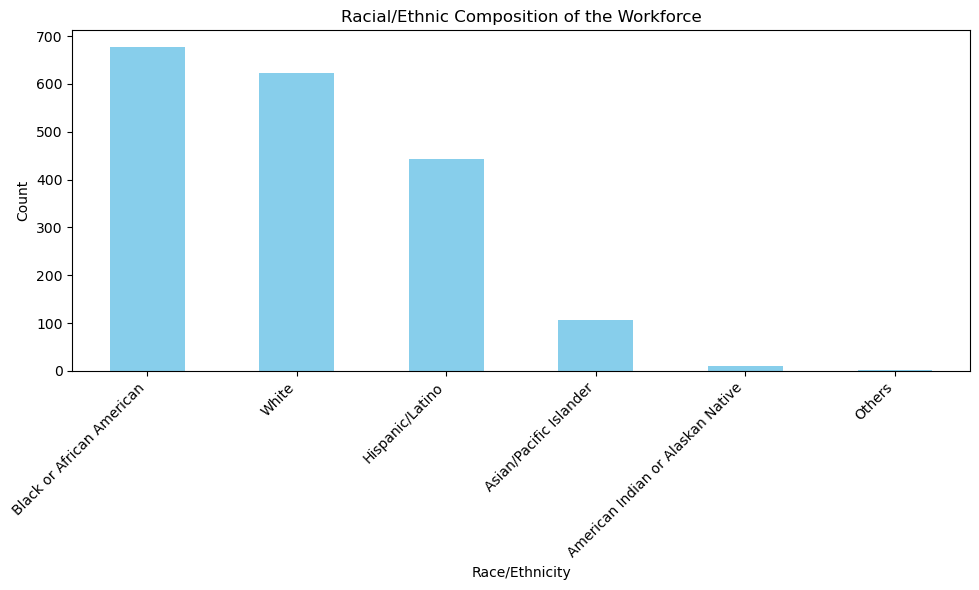

In [17]:
# Plotting the racial/ethnic composition
plt.figure(figsize=(10, 6))
racial_composition.plot(kind='bar', color='skyblue')
plt.title('Racial/Ethnic Composition of the Workforce')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha = 'right')  # Rotate x-labels for better visibility
plt.tight_layout()
plt.show()

In [18]:
# Group by Department and Race
department_race_counts = df.groupby(['DEPARTMENT', 'RACE']).size().unstack(fill_value=0)

# Calculate percentages within each department
department_race_percentages = department_race_counts.div(department_race_counts.sum(axis=1), axis=0) * 100

# Group by Position and Race
position_race_counts = df.groupby(['POSITION_TITLE', 'RACE']).size().unstack(fill_value=0)

# Calculate percentages within each position
position_race_percentages = position_race_counts.div(position_race_counts.sum(axis=1), axis=0) * 100

# Print or visualize the results
print("Representation of Races/Ethnicities Across Departments:")
print(department_race_percentages)

print("\nRepresentation of Races/Ethnicities Across Positions:")
print(position_race_percentages)

Representation of Races/Ethnicities Across Departments:
RACE                            American Indian or Alaskan Native  \
DEPARTMENT                                                          
Admn. & Regulatory Affairs                               0.000000   
City Controller's Office                                 0.000000   
City Council                                             0.000000   
Convention and Entertainment                             0.000000   
Dept of Neighborhoods (DON)                              5.882353   
Finance                                                  0.000000   
Fleet Management Department                              0.000000   
General Services Department                              0.000000   
Health & Human Services                                  2.803738   
Housing and Community Devp.                              4.545455   
Houston Airport System (HAS)                             0.970874   
Houston Emergency Center (HEC)                 

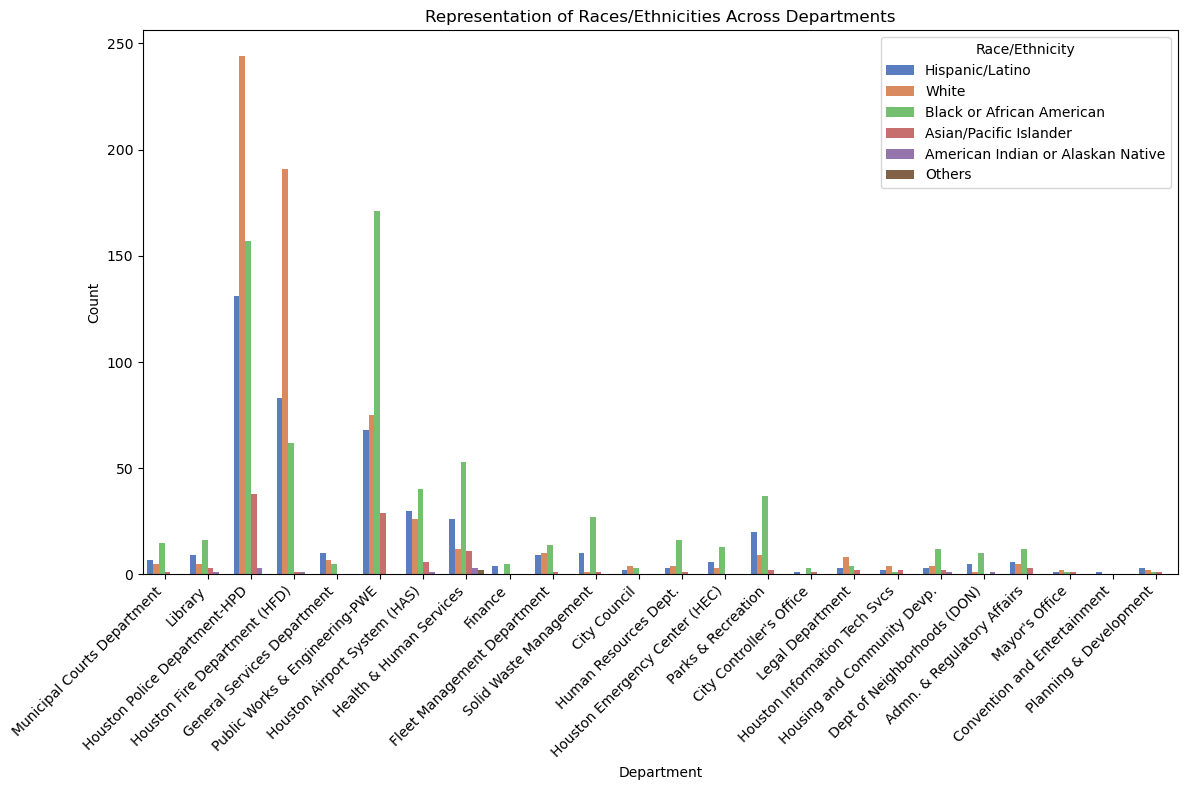

In [19]:
#Plot the data for easy visibility
plt.figure(figsize=(12, 8))
sns.countplot(x='DEPARTMENT', hue='RACE', data=df, palette='muted')
plt.title('Representation of Races/Ethnicities Across Departments')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45, ha = 'right')
plt.legend(title='Race/Ethnicity')
plt.tight_layout()
plt.show()

__Gender Representation__

In [20]:
# Calculate gender distribution within the organization
gender_distribution = df['GENDER'].value_counts(normalize = True) * 100

print('Gender Distribution within the Organization:')
print(gender_distribution)


Gender Distribution within the Organization:
GENDER
Male      68.640931
Female    31.359069
Name: proportion, dtype: float64


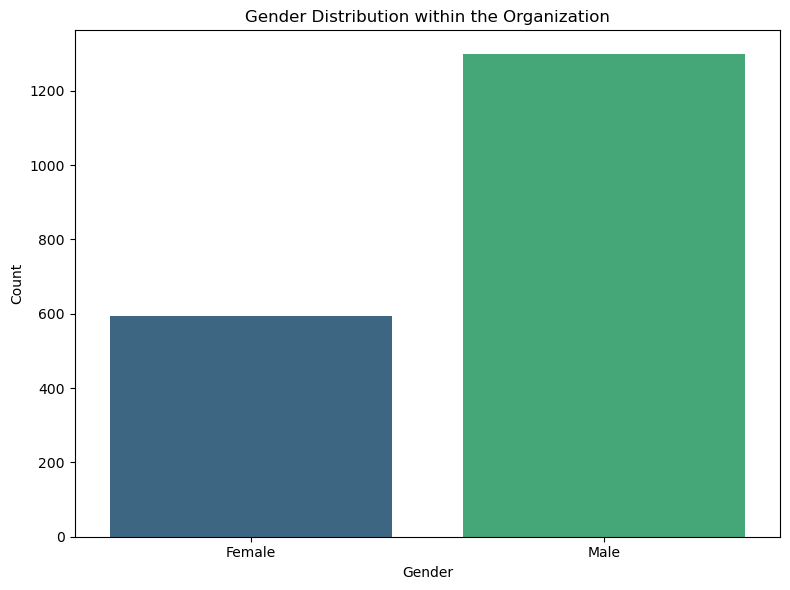

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='GENDER', data=df, palette='viridis')
plt.title('Gender Distribution within the Organization')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [22]:
# Check for gender imbalances in certain departments or roles
gender_imbalance_departments = df.groupby(['DEPARTMENT', 'GENDER']).size().unstack(fill_value = 0)
gender_imbalance_roles = df.groupby(['POSITION_TITLE', 'GENDER']).size().unstack(fill_value = 0)

print('\nGender Imbalances in Departments:')
print(gender_imbalance_departments)


print('\nGender Imbalances in Roles:')
print(gender_imbalance_roles)



Gender Imbalances in Departments:
GENDER                          Female  Male
DEPARTMENT                                  
Admn. & Regulatory Affairs          22     7
City Controller's Office             4     1
City Council                         7     4
Convention and Entertainment         1     0
Dept of Neighborhoods (DON)          8     9
Finance                              4     6
Fleet Management Department          3    33
General Services Department          2    20
Health & Human Services             82    27
Housing and Community Devp.         16     6
Houston Airport System (HAS)        36    70
Houston Emergency Center (HEC)      17     6
Houston Fire Department (HFD)       21   319
Houston Information Tech Svcs        1     8
Houston Police Department-HPD      146   429
Human Resources Dept.               19     5
Legal Department                     9     8
Library                             28     8
Mayor's Office                       3     2
Municipal Courts Dep

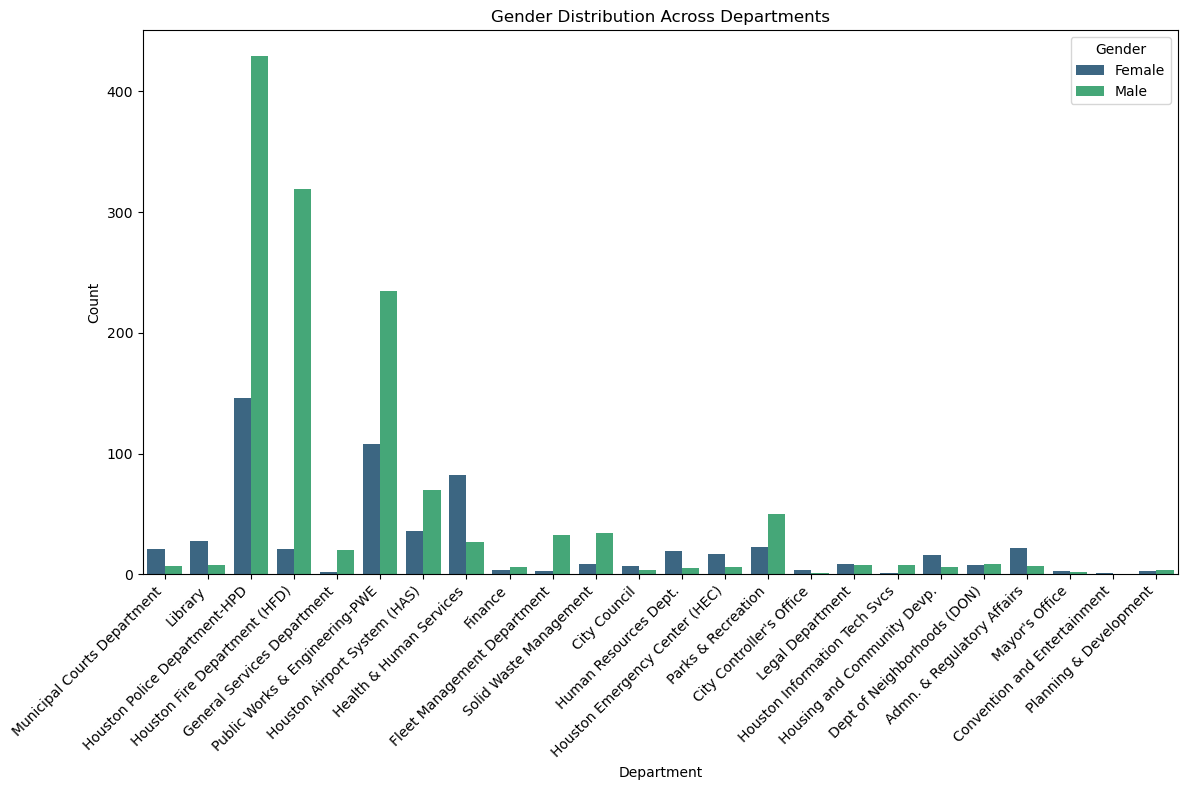

In [23]:
#Gender Imbalances in Departments
plt.figure(figsize=(12, 8))
sns.countplot(x='DEPARTMENT', hue='GENDER', data=df, palette='viridis')
plt.title('Gender Distribution Across Departments')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

__Employment Type Distribution__ 

In [24]:
df['EMPLOYMENT_TYPE'].value_counts()

EMPLOYMENT_TYPE
Full Time            1846
Part Time              20
HFD Deferred Term       9
Part Time 30            8
Temporary               8
Name: count, dtype: int64

In [25]:
# Calculate Employment Type Distribution 
employment_type_distribution = df['EMPLOYMENT_TYPE'].value_counts(normalize = True) * 100

print('Employment Type Distribution:')
print(employment_type_distribution)

Employment Type Distribution:
EMPLOYMENT_TYPE
Full Time            97.620307
Part Time             1.057641
HFD Deferred Term     0.475939
Part Time 30          0.423057
Temporary             0.423057
Name: proportion, dtype: float64


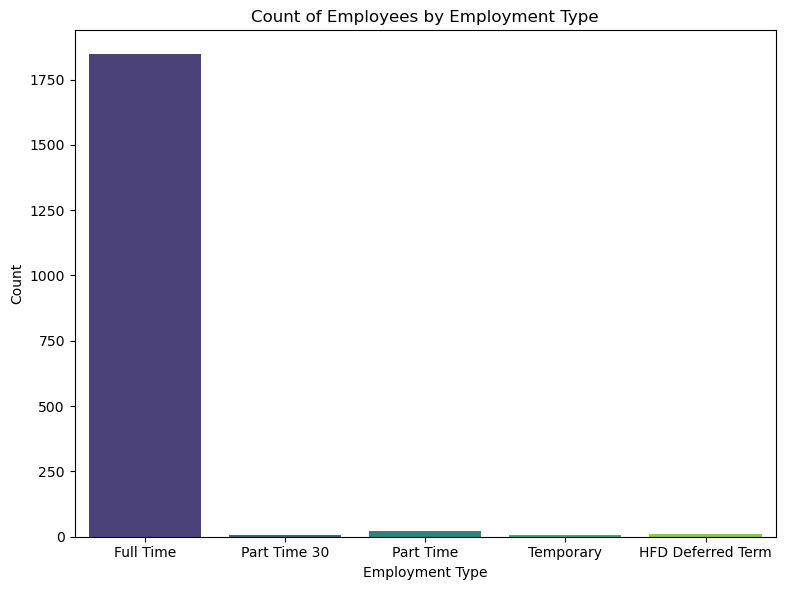

In [26]:
#Count of Employees by Employment Type
plt.figure(figsize=(8, 6))
sns.countplot(x='EMPLOYMENT_TYPE', data=df, palette='viridis')
plt.title('Count of Employees by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [27]:
# Check for differences in employment type across departments or positions
employment_type_departments = df.groupby(['DEPARTMENT', 'EMPLOYMENT_TYPE']).size().unstack(fill_value = 0)
employment_type_roles = df.groupby(['POSITION_TITLE', 'EMPLOYMENT_TYPE']).size().unstack(fill_value = 0)

print('\nEmployment Types Across Departments:')
print(employment_type_departments)


print('\nEmployment Types Across Roles:')
print(employment_type_roles)



Employment Types Across Departments:
EMPLOYMENT_TYPE                 Full Time  HFD Deferred Term  Part Time  \
DEPARTMENT                                                                
Admn. & Regulatory Affairs             29                  0          0   
City Controller's Office                5                  0          0   
City Council                            9                  0          0   
Convention and Entertainment            1                  0          0   
Dept of Neighborhoods (DON)            17                  0          0   
Finance                                10                  0          0   
Fleet Management Department            36                  0          0   
General Services Department            22                  0          0   
Health & Human Services               105                  0          2   
Housing and Community Devp.            20                  0          0   
Houston Airport System (HAS)          106                  0  

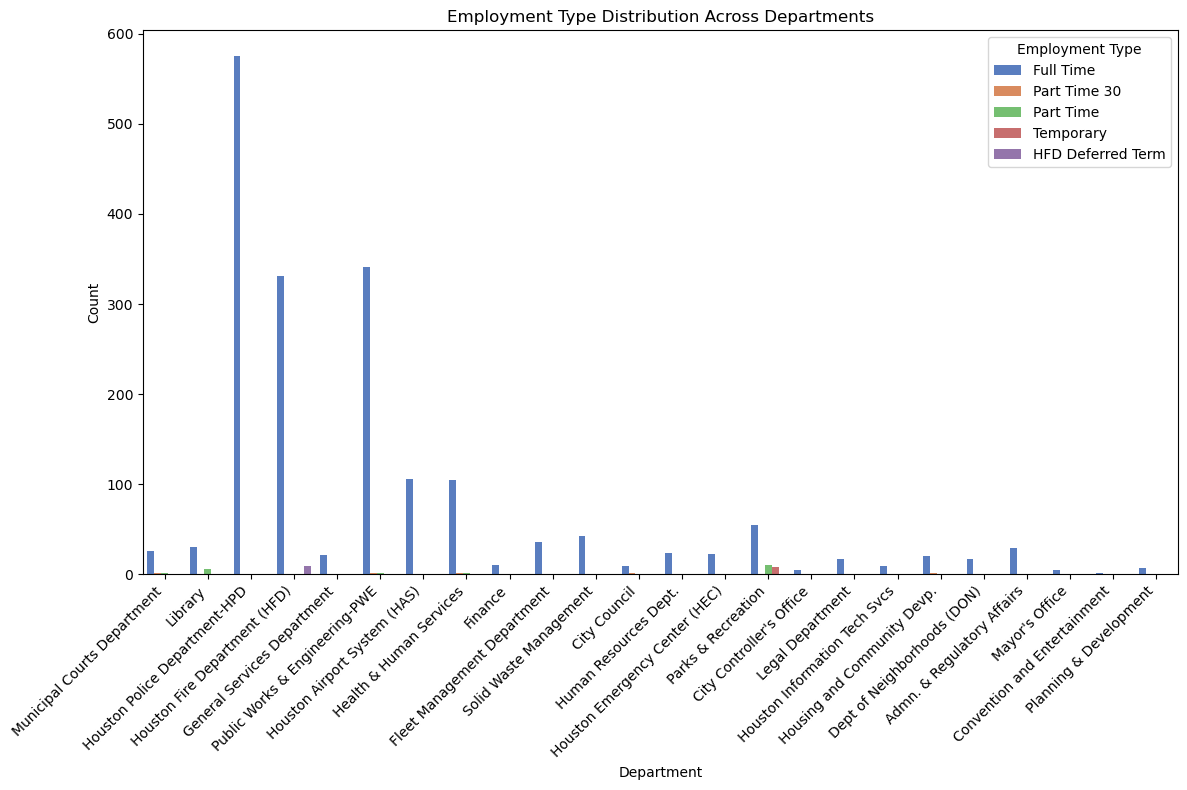

In [28]:
#Employment Type Distribution Across Departments
plt.figure(figsize=(12, 8))
sns.countplot(x='DEPARTMENT', hue='EMPLOYMENT_TYPE', data=df, palette='muted')
plt.title('Employment Type Distribution Across Departments')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Employment Type')
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()

__Age Distribution(Employment_Duration Distribution)__ 

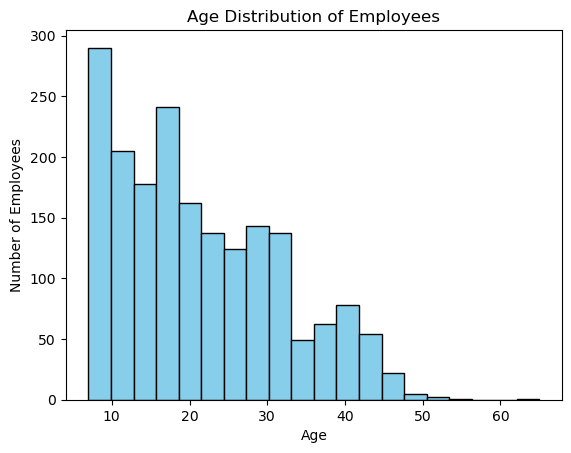

In [72]:
# Convert 'hire_date' to datetime and calculate age
df['HIRE_DATE'] = pd.to_datetime(df['HIRE_DATE'])
df['age'] = (pd.to_datetime('today') - df['HIRE_DATE']).astype('<m8[Y]')

# Age Distribution
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.title('Age Distribution of Employees')
plt.show()



In [73]:
# Age-related trends in job titles or salary levels
age_job_titles = df.groupby('age')['POSITION_TITLE'].value_counts().unstack().fillna(0)
age_salary_levels = df.groupby('age')['BASE_SALARY'].mean()

print("Age-Related Trends in Job Titles:")
print(age_job_titles)

print("\nAverage Salary Levels by Age:")
print(age_salary_levels)

Age-Related Trends in Job Titles:
POSITION_TITLE  3-1-1 TELECOMMUNICATOR  3-1-1 TELECOMMUNICATOR SUPERVISOR  \
age                                                                         
7.0                                0.0                                0.0   
8.0                                0.0                                0.0   
9.0                                0.0                                0.0   
10.0                               0.0                                0.0   
11.0                               0.0                                0.0   
12.0                               0.0                                0.0   
13.0                               0.0                                0.0   
14.0                               0.0                                0.0   
15.0                               0.0                                0.0   
16.0                               0.0                                1.0   
17.0                               0.0    

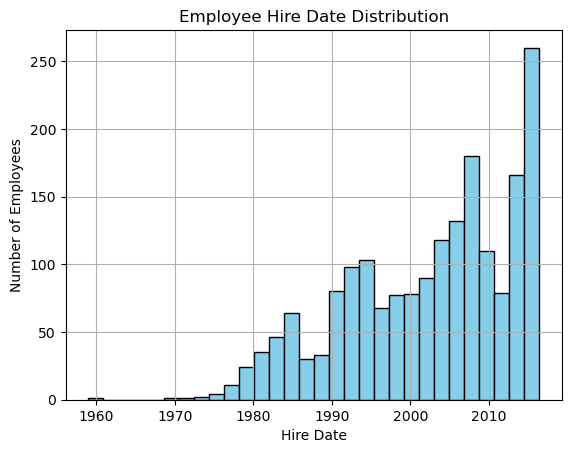

In [62]:
# Analyzing hire date distribution
hire_dates = pd.to_datetime(df['HIRE_DATE'])
hire_dates.hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Hire Date')
plt.ylabel('Number of Employees')
plt.title('Employee Hire Date Distribution')
plt.show()



In [64]:
# Explore trends in job titles or salary levels over time
df['hire_year'] = pd.to_datetime(df['HIRE_DATE']).dt.year
job_title_trends = df.groupby(['hire_year', 'POSITION_TITLE']).size().unstack(fill_value=0)
salary_level_trends = df.groupby('hire_year')['BASE_SALARY'].mean()

print("Trends in Job Titles Over Time:")
print(job_title_trends)

print("\nAverage Salary Levels Over Time:")
print(salary_level_trends)

Trends in Job Titles Over Time:
POSITION_TITLE  3-1-1 TELECOMMUNICATOR  3-1-1 TELECOMMUNICATOR SUPERVISOR  \
hire_year                                                                   
1958                                 0                                  0   
1968                                 0                                  0   
1971                                 0                                  0   
1972                                 0                                  0   
1974                                 0                                  0   
1975                                 0                                  0   
1976                                 0                                  0   
1977                                 0                                  0   
1978                                 0                                  0   
1979                                 0                                  0   
1980                                 0      

__Tenure Analysis__ 

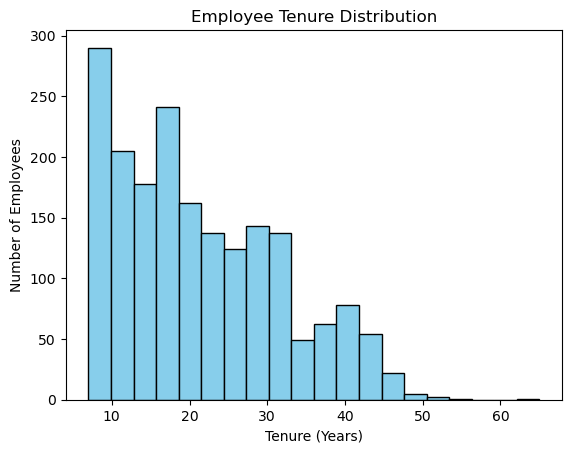

In [67]:
# Calculate tenure (length of employment)

df['tenure'] = (pd.to_datetime('today') - df['HIRE_DATE']).astype('<m8[Y]')

# Tenure Distribution
plt.hist(df['tenure'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Employees')
plt.title('Employee Tenure Distribution')
plt.show()



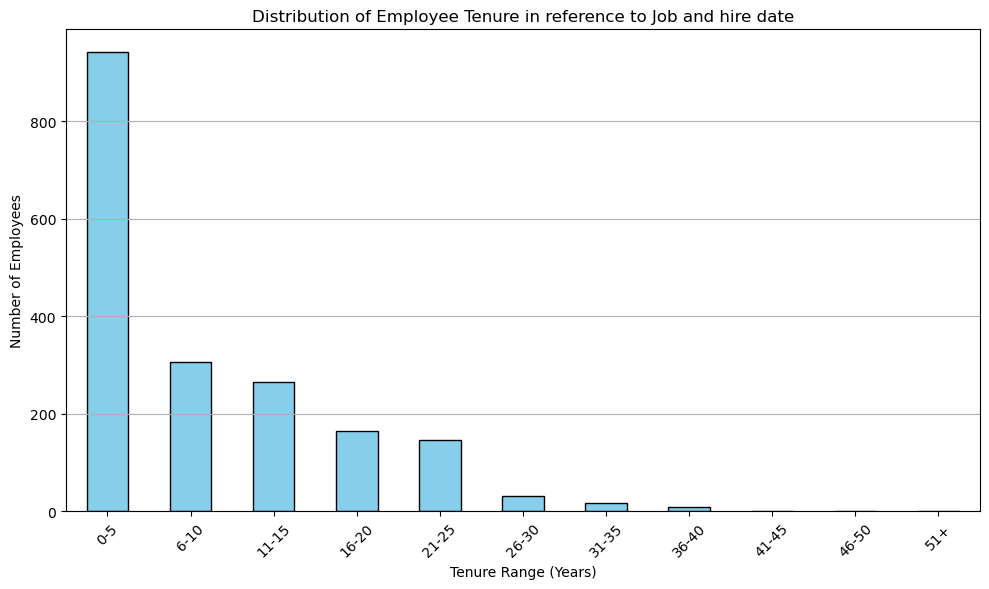

In [29]:
#Using Job Date and Hire date

# Calculate tenure (length of employment) for each employee
df['tenure'] = (df['JOB_DATE'] - df['HIRE_DATE']).dt.days / 365  # tenure in years

# Define tenure bins
tenure_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, float('inf')]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51+']

# Bin the tenure values
df['tenure_range'] = pd.cut(df['tenure'], bins=tenure_bins, labels=labels, right=False)

# Count the number of employees in each tenure range
tenure_distribution = df['tenure_range'].value_counts().sort_index()

# Plot the distribution of employee tenure using a bar chart
plt.figure(figsize=(10, 6))
tenure_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Employee Tenure in reference to Job and hire date')
plt.xlabel('Tenure Range (Years)')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

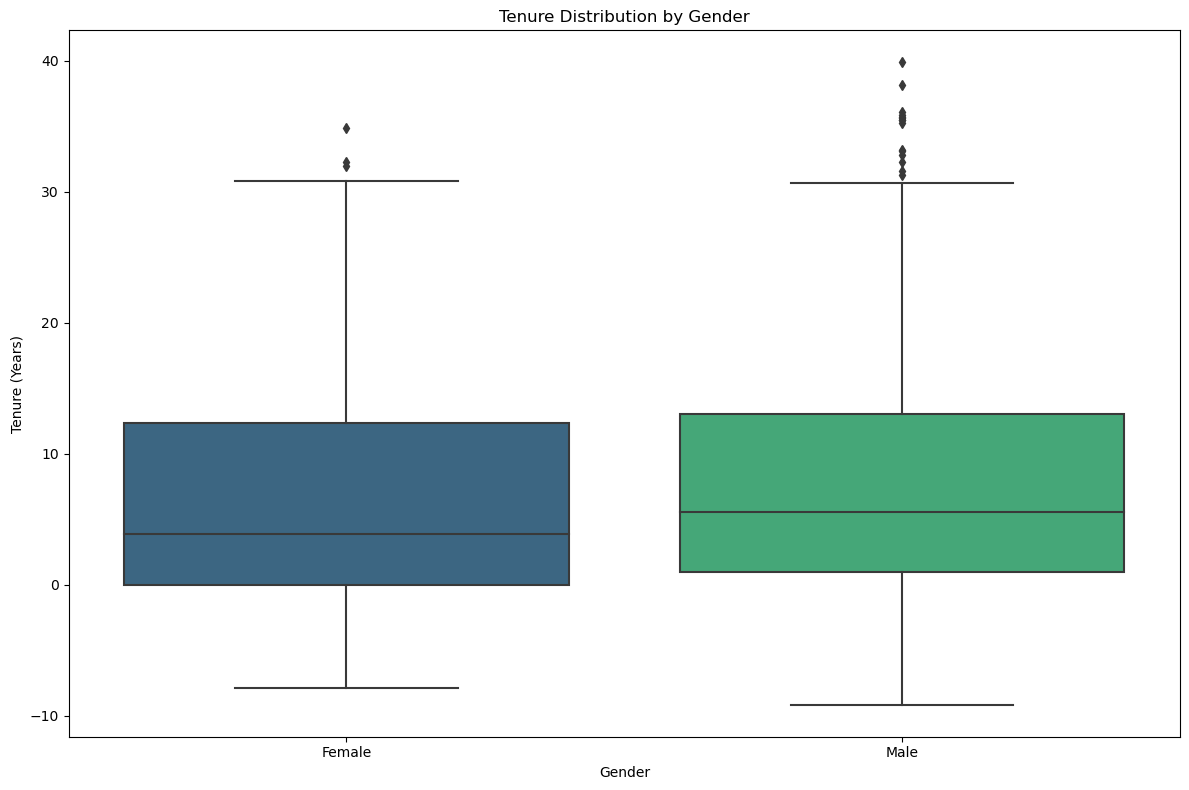

In [30]:
#Using Job Date and Hire date

# Differences in tenure between demographic groups or departments

df['tenure'] = (df['JOB_DATE'] - df['HIRE_DATE']).dt.days / 365  # tenure in years
# Plot box plots to compare tenure between different demographic groups
plt.figure(figsize=(12, 8))
sns.boxplot(x='GENDER', y='tenure', data=df, palette='viridis')
plt.title('Tenure Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Tenure (Years)')
plt.tight_layout()
plt.show()

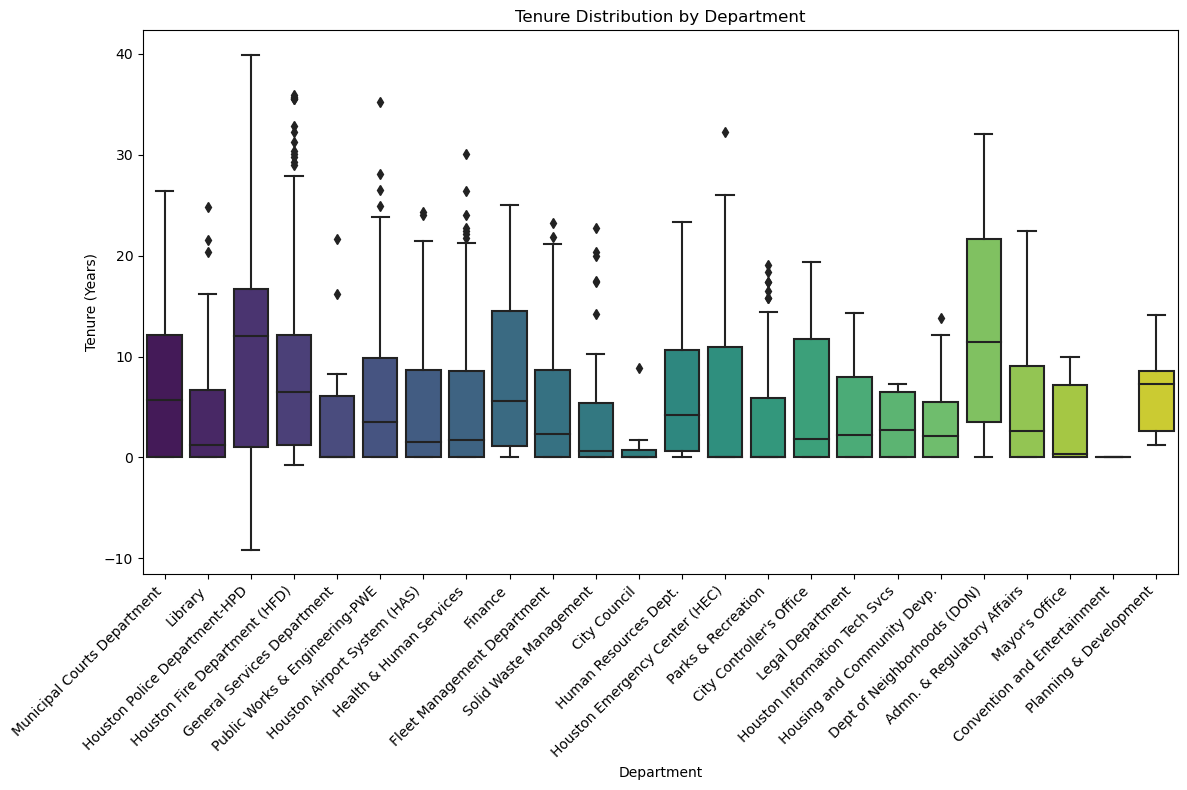

In [32]:
#Using Job Date and Hire date

df['tenure'] = (df['JOB_DATE'] - df['HIRE_DATE']).dt.days / 365  # tenure in years
plt.figure(figsize=(12, 8))
sns.boxplot(x='DEPARTMENT', y='tenure', data=df, palette='viridis')
plt.title('Tenure Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Tenure (Years)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

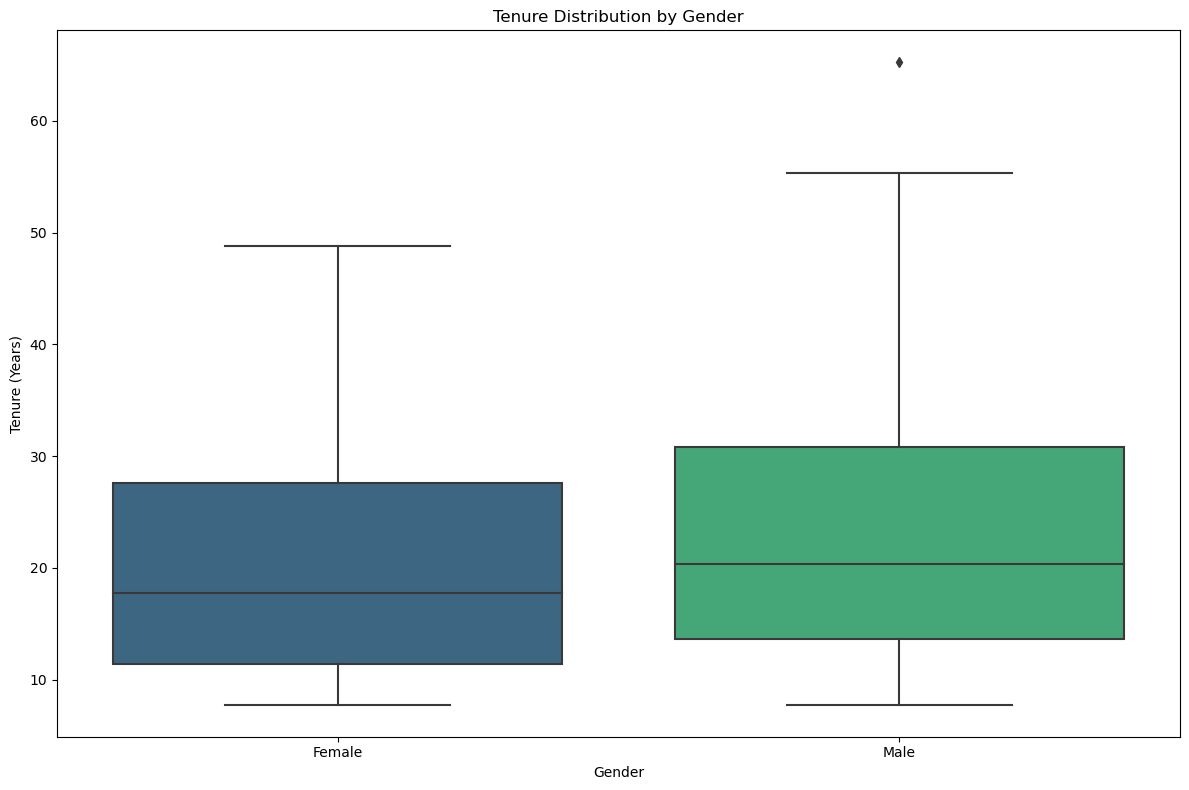

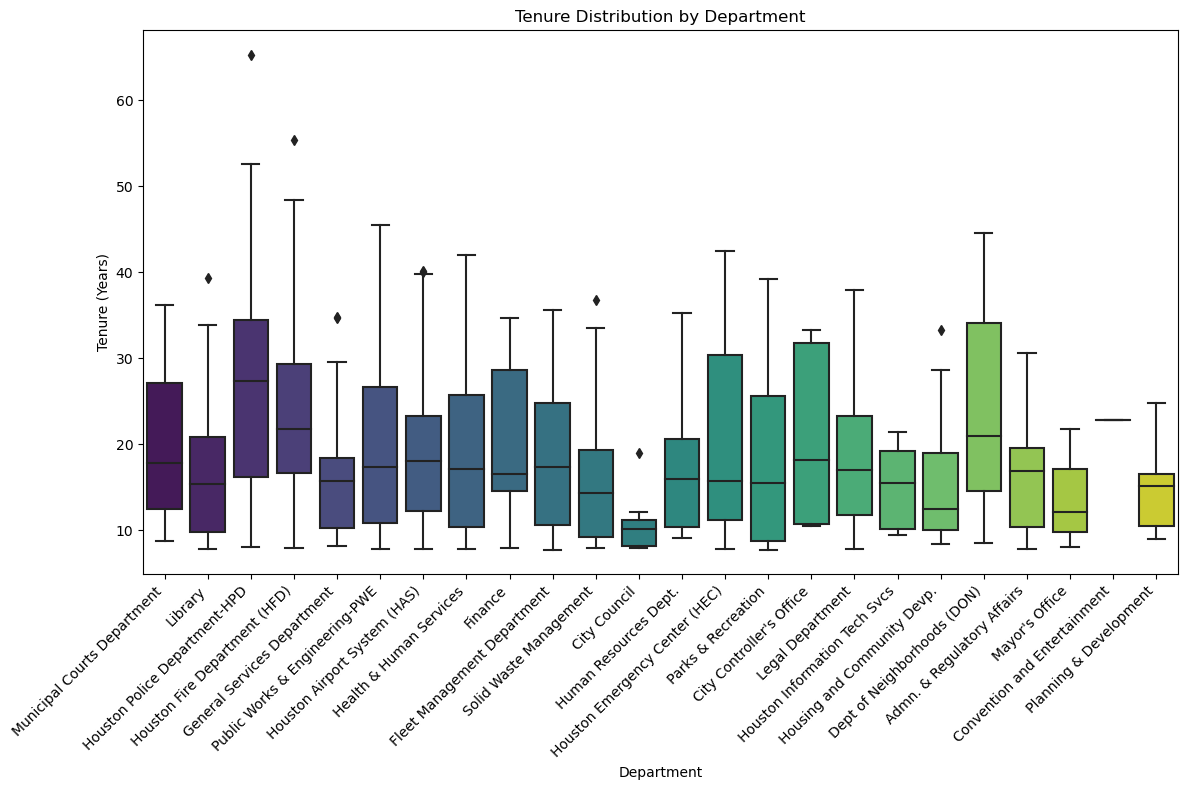

In [34]:
#Using current times.

df['tenure'] = (pd.Timestamp.now() - df['HIRE_DATE']).dt.days / 365  # tenure in years

# Plot box plots to compare tenure between different demographic groups
plt.figure(figsize=(12, 8))
sns.boxplot(x='GENDER', y='tenure', data=df, palette='viridis')
plt.title('Tenure Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Tenure (Years)')
plt.tight_layout()
plt.show()

# Plot box plots to compare tenure between different departments
plt.figure(figsize=(12, 8))
sns.boxplot(x='DEPARTMENT', y='tenure', data=df, palette='viridis')
plt.title('Tenure Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Tenure (Years)')
plt.xticks(rotation=45,ha ='right')
plt.tight_layout()
plt.show()

__Salary Distribution__

In [37]:
mean_salary = df['BASE_SALARY'].mean()
mode_salary = df['BASE_SALARY'].mode().iloc[0]  # Mode may return multiple values, so we take the first one
median_salary = df['BASE_SALARY'].median()

# Print statistics
print("Salary Distribution Statistics:")
print(f"Mean Salary: {mean_salary:.2f}")
print(f"Mode Salary: {mode_salary:.2f}")
print(f"Median Salary: {median_salary:.2f}")

Salary Distribution Statistics:
Mean Salary: 56215.65
Mode Salary: 66614.00
Median Salary: 55323.50


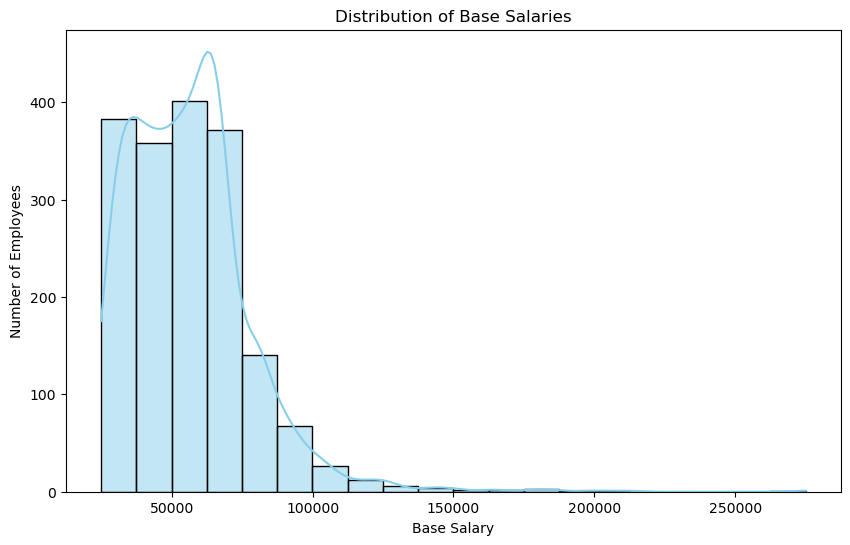

In [38]:
# Salary Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['BASE_SALARY'], bins=20, kde=True, color='skyblue')
plt.xlabel('Base Salary')
plt.ylabel('Number of Employees')
plt.title('Distribution of Base Salaries')
plt.show()



In [39]:
# Identify outliers or anomalies in salary levels
# Using Z-score method
from scipy.stats import zscore
df['zscore'] = zscore(df['BASE_SALARY'])
outliers = df[(df['zscore'] > 3) | (df['zscore'] < -3)]

print("\nOutliers in Salary Levels:")
print(outliers[['POSITION_TITLE', 'BASE_SALARY']])


Outliers in Salary Levels:
Empty DataFrame
Columns: [POSITION_TITLE, BASE_SALARY]
Index: []


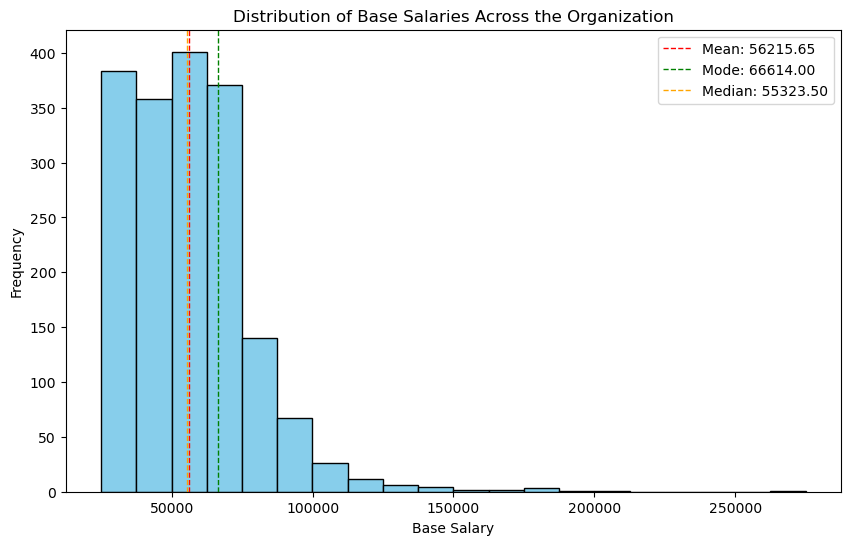

In [40]:
# Calculate mean, mode, and median of base salaries
mean_salary = df['BASE_SALARY'].mean()
mode_salary = df['BASE_SALARY'].mode().iloc[0]  # In case of multiple modes, take the first one
median_salary = df['BASE_SALARY'].median()

# Calculate outliers using IQR method
Q1 = df['BASE_SALARY'].quantile(0.25)
Q3 = df['BASE_SALARY'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['BASE_SALARY'] < lower_bound) | (df['BASE_SALARY'] > upper_bound)]

# Plot the distribution of base salaries
plt.figure(figsize=(10, 6))
plt.hist(df['BASE_SALARY'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(mean_salary, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_salary:.2f}')
plt.axvline(mode_salary, color='green', linestyle='dashed', linewidth=1, label=f'Mode: {mode_salary:.2f}')
plt.axvline(median_salary, color='orange', linestyle='dashed', linewidth=1, label=f'Median: {median_salary:.2f}')
plt.xlabel('Base Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Base Salaries Across the Organization')
plt.legend()
plt.show()



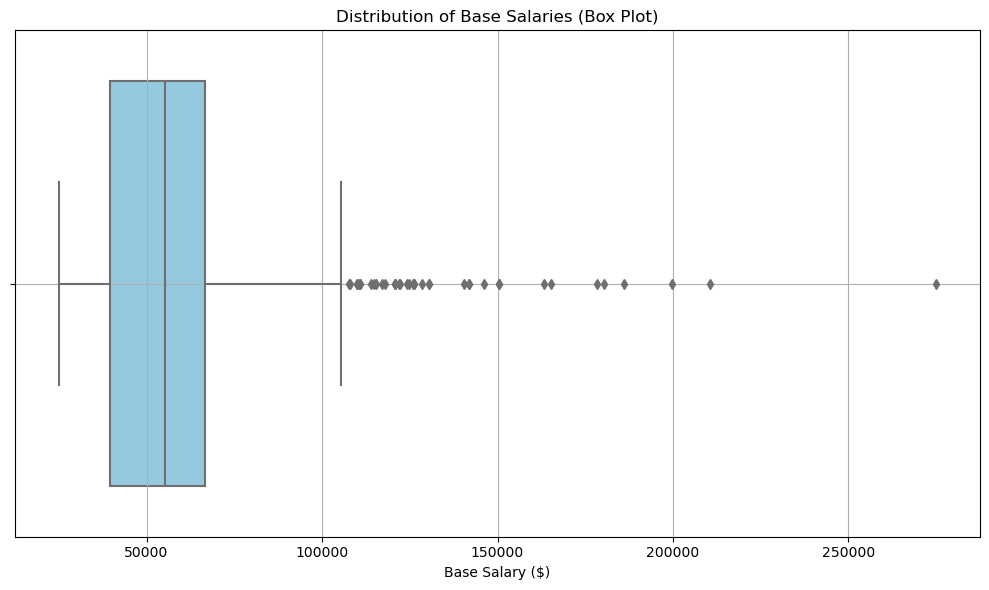

In [41]:
# Visualize the distribution of salaries using a box plot
base_salaries = df['BASE_SALARY']
plt.figure(figsize=(10, 6))
sns.boxplot(x=base_salaries, color='skyblue')
plt.title('Distribution of Base Salaries (Box Plot)')
plt.xlabel('Base Salary ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:

# Print outliers
print("Outliers:")
print(outliers)

Outliers:
                                     POSITION_TITLE  \
UNIQUE_ID                                             
0                       ASSISTANT DIRECTOR (EX LVL)   
8          DEPUTY ASSISTANT DIRECTOR (EXECUTIVE LEV   
11                               CHIEF PHYSICIAN,MD   
43                 ASSOCIATE EMS PHYSICIAN DIRECTOR   
169            ASSISTANT DIRECTOR (EXECUTIVE LEVEL)   
178             ASSOCIATE EMS PHYSICIAN DIRECTOR,MD   
186                               MANAGING ENGINEER   
237            ASSISTANT DIRECTOR (EXECUTIVE LEVEL)   
297        ASSISTANT DIRECTOR-PUBLIC WORKS (EXECUTI   
366        DEPUTY ASSISTANT DIRECTOR (EXECUTIVE LEV   
522              DEPUTY ASSISTANT DIRECTOR (EX LVL)   
561            ASSISTANT DIRECTOR (EXECUTIVE LEVEL)   
593                                   CITY ATTORNEY   
605               DEPUTY DIRECTOR (EXECUTIVE LEVEL)   
708                  EXECUTIVE ASSISTANT FIRE CHIEF   
713             EXECUTIVE STAFF ANALYST (EXE LEVEL)   


__Salary Disparities__ 

Average Salary by Race and Gender:
GENDER                                   Female          Male
RACE                                                         
American Indian or Alaskan Native  60238.800000  60305.400000
Asian/Pacific Islander             63226.300000  61149.040541
Black or African American          48966.672414  51220.777159
Hispanic/Latino                    46647.530769  55213.667797
Others                             63785.000000  38771.000000
White                              66793.352941  65283.030303


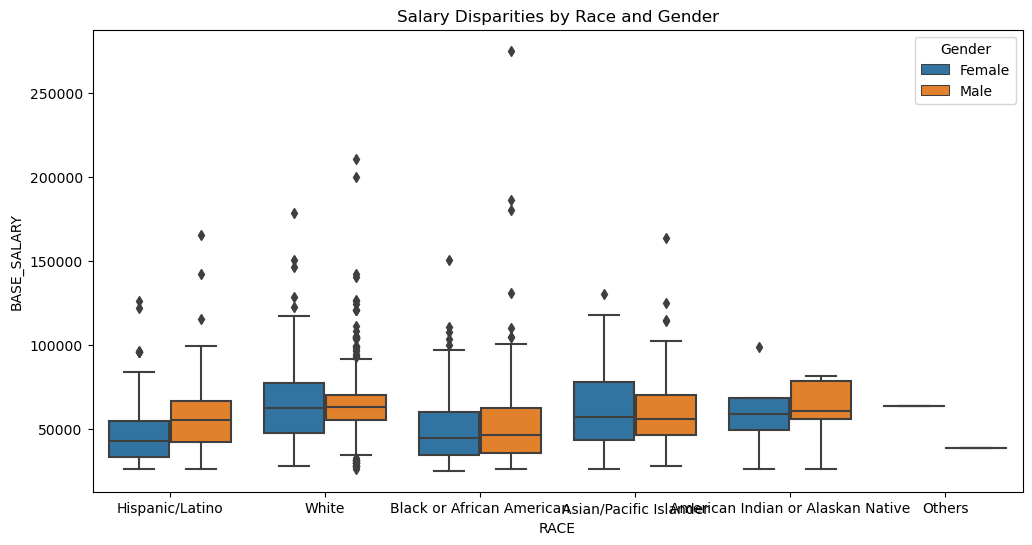

In [50]:
# Check for significant differences in salaries between different demographic groups
salary_by_demographics = df.groupby(['RACE', 'GENDER'])['BASE_SALARY'].mean().unstack()

print("Average Salary by Race and Gender:")
print(salary_by_demographics)

# Visualize salary disparities using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='RACE', y='BASE_SALARY', hue='GENDER', data=df)
plt.xlabel('RACE')
plt.ylabel('BASE_SALARY')
plt.title('Salary Disparities by Race and Gender')
plt.legend(title='Gender', loc='upper right')
plt.show()



In [55]:
# Calculate gender pay gap
gender_pay_gap = df.groupby('GENDER')['BASE_SALARY'].mean()['Male'] - df.groupby('GENDER')['BASE_SALARY'].mean()['Female']

print(f"\nGender Pay Gap: {gender_pay_gap}")

# Calculate racial pay gap
racial_pay_gap = df.groupby('RACE')['BASE_SALARY'].mean()['White'] - df.groupby('RACE')['BASE_SALARY'].mean()['Black or African American']

print(f"Racial Pay Gap: {racial_pay_gap}")


Gender Pay Gap: 5697.738395979242
Racial Pay Gap: 15342.623681823643


__Salary by Department/Position__



In [59]:
# Average salary within each department
avg_salary_by_department = df.groupby('DEPARTMENT')['BASE_SALARY'].mean()

print("Average Salary by Department:")
print(avg_salary_by_department)

# Average salary within each position title
avg_salary_by_position = df.groupby('POSITION_TITLE')['BASE_SALARY'].mean()

print("\nAverage Salary by Position Title:")
print(avg_salary_by_position)



Average Salary by Department:
DEPARTMENT
Admn. & Regulatory Affairs         50890.551724
City Controller's Office           55711.600000
City Council                       59089.222222
Convention and Entertainment       38397.000000
Dept of Neighborhoods (DON)        47092.882353
Finance                            79650.300000
Fleet Management Department        43994.305556
General Services Department        51295.818182
Health & Human Services            51522.180952
Housing and Community Devp.        61387.700000
Houston Airport System (HAS)       53956.066038
Houston Emergency Center (HEC)     46415.739130
Houston Fire Department (HFD)      61524.073620
Houston Information Tech Svcs      76112.777778
Houston Police Department-HPD      61376.804688
Human Resources Dept.              56311.833333
Legal Department                  104959.529412
Library                            43997.500000
Mayor's Office                     86489.600000
Municipal Courts Department        53745.384615

In [60]:
# Identify departments or roles that offer higher salaries compared to others
highest_paid_departments = avg_salary_by_department[avg_salary_by_department == avg_salary_by_department.max()]
highest_paid_positions = avg_salary_by_position[avg_salary_by_position == avg_salary_by_position.max()]

print("\nDepartments with Highest Average Salary:")
print(highest_paid_departments)

print("\nPositions with Highest Average Salary:")
print(highest_paid_positions)


Departments with Highest Average Salary:
DEPARTMENT
Legal Department    104959.529412
Name: BASE_SALARY, dtype: float64

Positions with Highest Average Salary:
POSITION_TITLE
CITY ATTORNEY    275000.0
Name: BASE_SALARY, dtype: float64
